In [1]:
import pandas as pd,numpy as np
import seaborn as sns,matplotlib.pyplot as plt

#The main aim of this project is to detect if we can certainly issue credit card to a particular person , is that risk good or bad

In [2]:
#Importing the data
data_credit = pd.read_csv("data.csv")
data_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [8]:
print(data_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB
None


In [ ]:
data_credit.drop(columns='Unnamed: 0',inplace=True)

In [8]:
#Looking the unique values
print(data_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


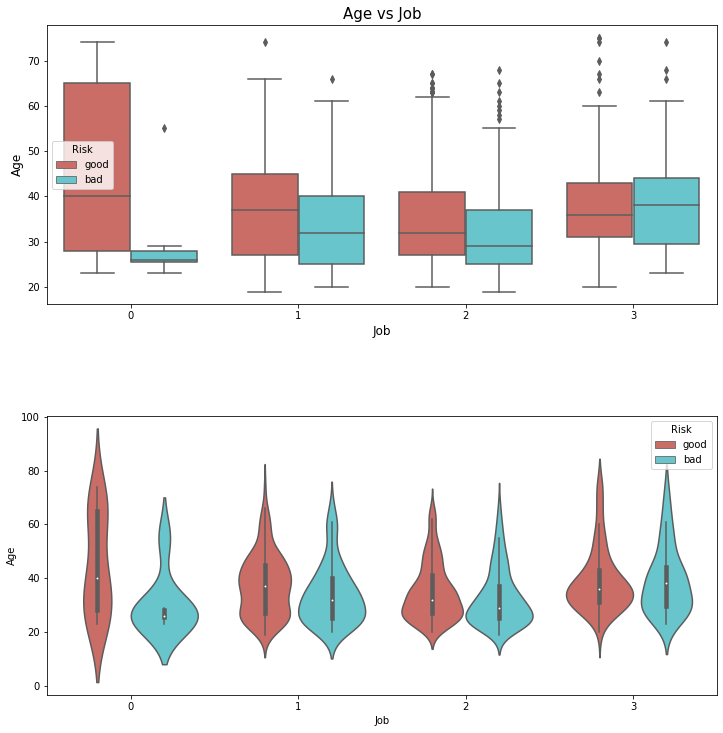

In [9]:
fig,ax=plt.subplots(figsize=(12,12),nrows=2)
g = sns.boxplot(x = "Job",y="Age",data=data_credit,palette="hls",
               ax=ax[0],hue="Risk")      #hue represents on the basis of which parameter category we want to plot
g.set_title("Age vs Job",fontsize=15)
g.set_xlabel("Job",fontsize=12)
g.set_ylabel("Age",fontsize=12)
g1 = sns.violinplot(x = "Job",y="Age",data=data_credit,palette="hls",ax=ax[1],hue="Risk")
g.set_title("Age vs Job",fontsize=15)
g.set_xlabel("Job",fontsize=12)
g.set_ylabel("Age",fontsize=12)
plt.subplots_adjust(hspace=0.4,top=0.9)  # boxplot is the most suggestible for quartiles when there is chance of outliers

In [10]:
print(pd.crosstab(data_credit["Saving accounts"],data_credit.Risk))

Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


Description of Distribution Savings accounts by Risk: 
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


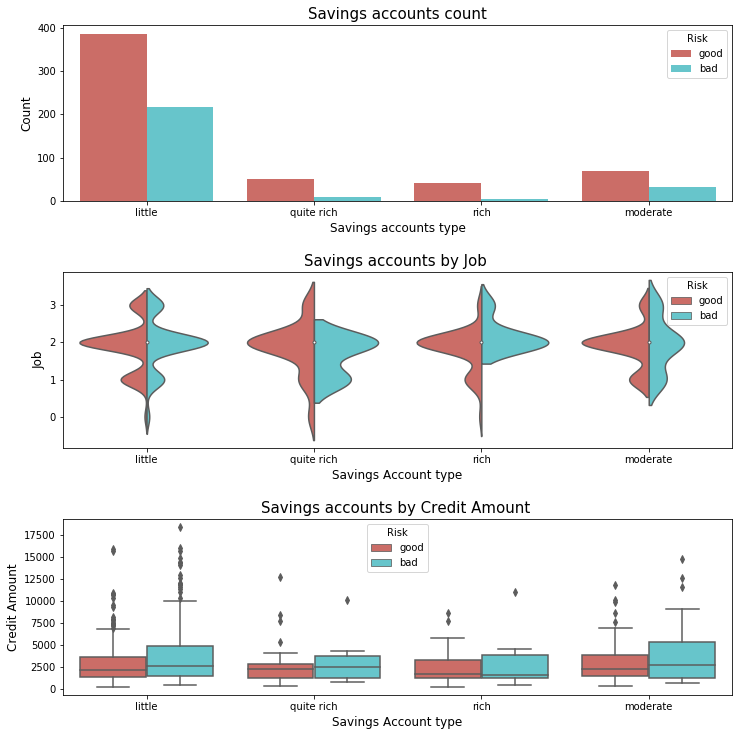

In [11]:
print("Description of Distribution Savings accounts by Risk: ")
print(pd.crosstab(data_credit["Saving accounts"],data_credit.Risk))
fig,ax = plt.subplots(3,1,figsize =(12,12))
g = sns.countplot(x = "Saving accounts",data = data_credit,palette = 'hls',
                 ax = ax[0],hue = "Risk")
g.set_title("Savings accounts count",fontsize = 15)
g.set_xlabel("Savings accounts type",fontsize = 12)
g.set_ylabel("Count",fontsize = 12)
g1 = sns.violinplot(x = "Saving accounts",y = "Job",data =data_credit,
                    ax = ax[1],hue = "Risk",
                   split = True,palette = "hls")
g1.set_title("Savings accounts by Job ",fontsize = 15)
g1.set_xlabel("Savings Account type",fontsize = 12)
g1.set_ylabel("Job",fontsize = 12)

g = sns.boxplot(x = "Saving accounts",y="Credit amount",
                data = data_credit,palette = "hls",
                ax = ax[2],hue = "Risk")
g.set_title("Savings accounts by Credit Amount ",fontsize = 15)
g.set_xlabel("Savings Account type",fontsize = 12)
g.set_ylabel("Credit Amount",fontsize = 12)
plt.subplots_adjust(hspace=0.4,top = 0.9)

In [12]:
print(pd.crosstab(data_credit.Purpose,data_credit.Risk))

Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


Values describe:
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


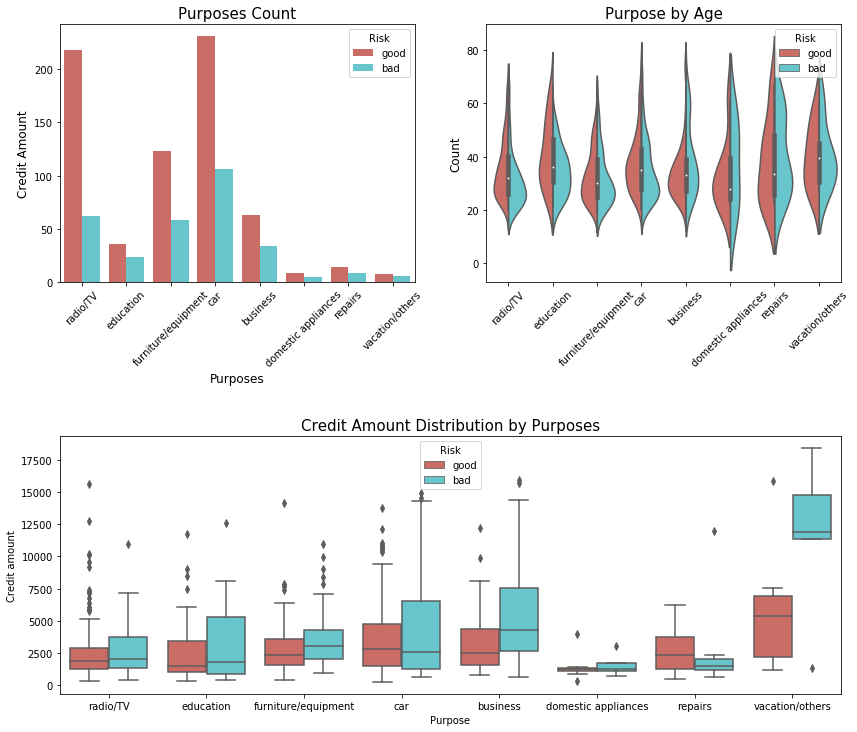

In [14]:
print("Values describe:")
print(pd.crosstab(data_credit.Purpose,data_credit.Risk))
plt.figure(figsize = (14,12))
plt.subplot(221)
g = sns.countplot(x = "Purpose",data = data_credit,palette = 'hls',
                 hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation = 45)
g.set_title("Purposes Count",fontsize = 15)
g.set_xlabel("",fontsize = 12)
g.set_ylabel("Count",fontsize = 12)
plt.subplot(222)
g1 = sns.violinplot(x = "Purpose",y = "Age",data =data_credit,
                    hue = "Risk",
                   split = True,palette = "hls")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
g1.set_title("Purpose by Age",fontsize = 15)
g1.set_xlabel("",fontsize = 12)
g1.set_ylabel("Count",fontsize = 12)
plt.subplot(212)
g2 = sns.boxplot(x = "Purpose",y="Credit amount",
                data = data_credit,palette = "hls",
                hue = "Risk")
g2.set_title("Credit Amount Distribution by Purposes",fontsize = 15)
g.set_xlabel("Purposes",fontsize = 12)
g.set_ylabel("Credit Amount",fontsize = 12)
plt.subplots_adjust(hspace=0.6,top = 0.9)

In [16]:
print(data_credit.groupby("Checking account")["Checking account"].count())

Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


Total values of the most missing variable:
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


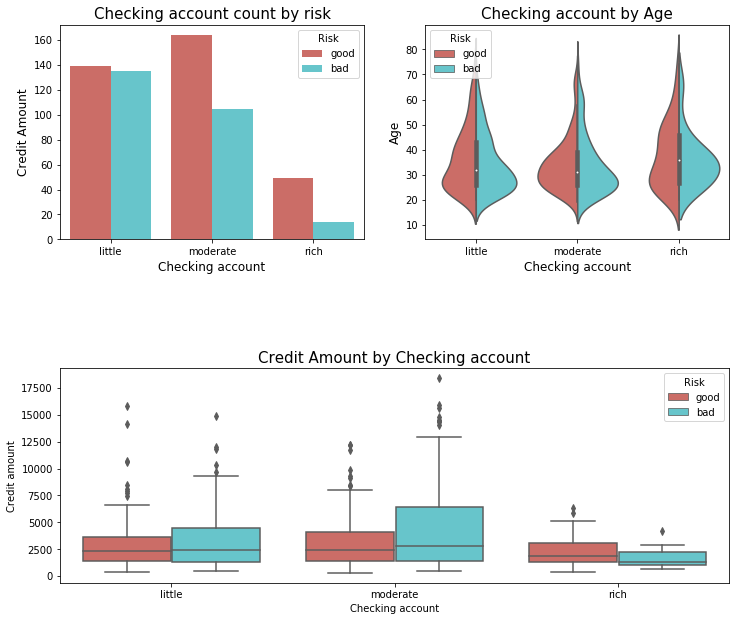

In [17]:
print("Total values of the most missing variable:")
print(data_credit.groupby("Checking account")["Checking account"].count())
plt.figure(figsize = (12,10))
g = plt.subplot(221)
g = sns.countplot(x = "Checking account",data = data_credit,palette = 'hls',
                 hue = "Risk")
g.set_title("Checking account count by risk",fontsize = 15)
g.set_xlabel("Checking acccount",fontsize = 12)
g.set_ylabel("Count",fontsize = 12)
g1 = plt.subplot(222)
g1 = sns.violinplot(x = "Checking account",y = "Age",data =data_credit,
                    hue = "Risk",
                   split = True,palette = "hls")
g1.set_title("Checking account by Age",fontsize = 15)
g1.set_xlabel("Checking account",fontsize = 12)
g1.set_ylabel("Age",fontsize = 12)
plt.subplot(212)
g2 = sns.boxplot(x = "Checking account",y="Credit amount",
                data = data_credit,palette = "hls",
                hue = "Risk")
g2.set_title("Credit Amount by Checking account",fontsize = 15)
g.set_xlabel("Checking account",fontsize = 12)
g.set_ylabel("Credit Amount",fontsize = 12)
plt.subplots_adjust(wspace = 0.2,hspace=0.6,top = 0.9)

In [18]:
print(pd.crosstab(data_credit.Sex,data_credit.Job))

Job      0    1    2    3
Sex                      
female  12   64  197   37
male    10  136  433  111


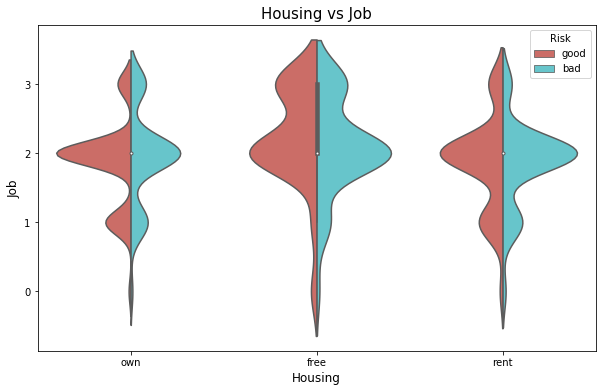

In [19]:
plt.figure(figsize = (10,6))
g = sns.violinplot(x = "Housing",y = "Job",data=data_credit,hue = "Risk",
                  palette = 'hls',split = True)
g.set_title("Housing vs Job",fontsize = 15)
g.set_xlabel("Housing",fontsize = 12)
g.set_ylabel("Job",fontsize = 12)
plt.show()

In [20]:
print(pd.crosstab(data_credit["Checking account"],data_credit.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [21]:
d = ['Purpose','Sex']
cm = sns.light_palette("blue",as_cmap = True) #crosstab representation using colormap
pd.crosstab(data_credit[d[0]],data_credit[d[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [22]:
interval = (18,25,35,60,120)
catos = ['Student','Young','Adult','Senior']
data_credit['Age_cat']=pd.cut(data_credit.Age,interval,labels=catos)
data_credit['Age_cat'].head(20)

0      Senior
1     Student
2       Adult
3       Adult
4       Adult
5       Young
6       Adult
7       Young
8      Senior
9       Young
10    Student
11    Student
12    Student
13      Adult
14      Young
15      Young
16      Adult
17    Student
18      Adult
19      Young
Name: Age_cat, dtype: category
Categories (4, object): [Student < Young < Adult < Senior]

In [23]:
print('Purpose:',data_credit.Purpose.unique()) # trying to see the unique values in each categories
print('Sex:',data_credit.Sex.unique())
print('Housing:',data_credit.Housing.unique())
print('Saving accounts:',data_credit['Saving accounts'].unique())
print("Risk:",data_credit["Risk"].unique())
print("Checking account:",data_credit["Checking account"].unique())
print("Age_cat:",data_credit['Age_cat'].unique())

Purpose: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex: ['male' 'female']
Housing: ['own' 'free' 'rent']
Saving accounts: [nan 'little' 'quite rich' 'rich' 'moderate']
Risk: ['good' 'bad']
Checking account: ['little' 'moderate' nan 'rich']
Age_cat: [Senior, Student, Adult, Young]
Categories (4, object): [Student < Young < Adult < Senior]


In [24]:
def one_hot_encoder(df,nan_as_category=False):
    original_columns = list(df.columns)
    categorical_columns = [clm for clm in df.columns if df[clm].dtype == "object"]
    df = pd.get_dummies(df,columns=categorical_columns,dummy_na=nan_as_category,
                       drop_first=True) #drop_first drops the 1st column 
    new_columns = [c for c in df.columns if c not in original_columns]
    return df,new_columns
data_credit["Saving accounts"] = data_credit["Saving accounts"].fillna('no_inf')
data_credit["Checking account"] = data_credit["Checking account"].fillna('no_inf')

#Purpose to dummies
data_credit = data_credit.merge(pd.get_dummies(data_credit.Purpose,drop_first=True,prefix="Purpose"),
                           left_index=True,right_index=True)

#Sex for dummies
data_credit = data_credit.merge(pd.get_dummies(data_credit.Sex,drop_first=True,prefix="Purpose"),
                           left_index=True,right_index=True)

#Housing
data_credit = data_credit.merge(pd.get_dummies(data_credit.Housing,drop_first = True,
                                          prefix = 'Housing'),left_index = True,
                           right_index = True)
#Housing get Saving account
data_credit = data_credit.merge(pd.get_dummies(data_credit['Saving accounts'],
                                           drop_first = True,
                                          prefix = 'Savings'),left_index = True,
                           right_index = True)
#Housing get Checking account
data_credit = data_credit.merge(pd.get_dummies(data_credit['Checking account'],
                                           drop_first = True,
                                          prefix = 'Check'),left_index = True,
                           right_index = True)
#Housing get Age Categories
data_credit = data_credit.merge(pd.get_dummies(data_credit['Age_cat'],
                                           drop_first = True,
                                prefix = 'Age_cat'),left_index = True,right_index= True)

In [25]:
del data_credit["Saving accounts"]
del data_credit["Checking account"]
del data_credit["Purpose"]
del data_credit["Sex"]
del data_credit["Housing"]
del data_credit["Age_cat"]

In [26]:
data_credit.head() #all the data catogeries in columns are replaced by dummies hence we can 
                   #delete extra columns or old coloumns, no data will be lost 

,Age,Job,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,...,Savings_moderate,Savings_no_inf,Savings_quite rich,Savings_rich,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,67,2,1169,6,good,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,22,2,5951,48,bad,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,49,1,2096,12,good,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,45,2,7882,42,good,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,53,2,4870,24,bad,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
data_credit["Credit amount"] = np.log(data_credit["Credit amount"])

In [28]:
data_credit.head() 

,Age,Job,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,...,Savings_moderate,Savings_no_inf,Savings_quite rich,Savings_rich,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,67,2,7.063904,6,good,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,22,2,8.691315,48,bad,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,49,1,7.647786,12,good,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,45,2,8.972337,42,good,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,53,2,8.490849,24,bad,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#now we can import libraries and validate data further

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [30]:
X= data_credit.drop("Risk",axis=1).values
y = data_credit["Risk"].map({'good':1,"bad":0})

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) #generalized value for random_state
                                                                                 #when we are working on huge data is 42

In [32]:
#prepare models
models =[]
models.append(("RF",RandomForestClassifier()))

In [33]:
#evaluate each model inturn
results = []
names = []
scoring = "recall"
for name,model in models:
    kfold = KFold(n_splits=10,random_state = 7)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF: 0.776617 (0.047454)


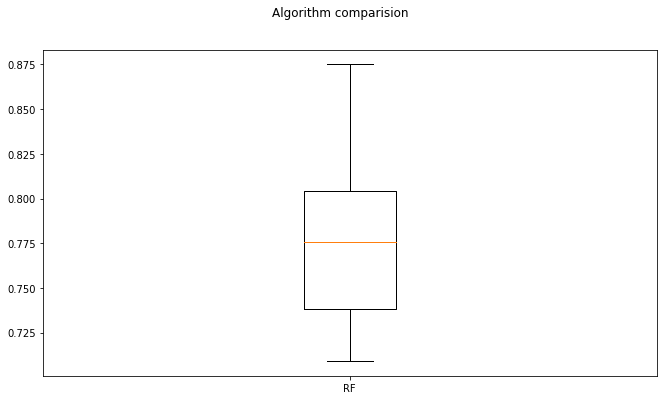

In [34]:
fig = plt.figure(figsize=(11,6))
fig.suptitle("Algorithm comparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
param_grid = {'max_depth':[3,5,7,9,10,None],'n_estimators':[3,5,10,25,50,150],
             'max_features':[4,7,19,20,30]}

In [ ]:
#creating the classifier
model = RandomForestClassifier(random_state=2)
grid_search=GridSearchCV(model,param_grid =param_grid,cv=5,scoring='recall',
                        verbose = 4,n_jobs = -1)
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

In [39]:
rf = RandomForestClassifier(max_depth=3,max_features=4,n_estimators=50,
                            random_state=2)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Confusion matrix",confusion_matrix(y_test,y_pred))
print("Accuracy Score",accuracy_score(y_test,y_pred))

Confusion matrix [[  3  69]
 [  0 178]]
Accuracy Score 0.724


Hence by predicting on different X_test, values we can find if the risk of sanctioning a credit card is good or bad